In [9]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
X, y = make_regression(n_samples=100,
                       n_features=1,
                       n_informative=1,
                       noise=10,
                       random_state=0)

In [10]:
print(X)

[[-0.35955316]
 [ 0.97663904]
 [ 0.40234164]
 [-0.81314628]
 [-0.88778575]
 [ 0.44386323]
 [-0.97727788]
 [ 0.42833187]
 [ 0.20827498]
 [-0.31155253]
 [-0.51080514]
 [ 0.12691209]
 [-1.53624369]
 [-0.40178094]
 [ 0.6536186 ]
 [ 1.17877957]
 [-0.17992484]
 [ 1.78587049]
 [ 1.45427351]
 [-0.68481009]
 [ 0.97873798]
 [ 1.89588918]
 [-0.4380743 ]
 [ 0.3130677 ]
 [ 0.76103773]
 [ 0.77749036]
 [ 1.9507754 ]
 [ 0.33367433]
 [-0.34791215]
 [ 1.53277921]
 [-0.89546656]
 [-0.57884966]
 [-1.04855297]
 [ 0.37816252]
 [ 0.01050002]
 [ 0.46278226]
 [ 0.14404357]
 [-0.40317695]
 [ 0.0519454 ]
 [-1.25279536]
 [ 1.05445173]
 [ 0.40015721]
 [-1.70627019]
 [ 2.2408932 ]
 [ 0.17742614]
 [-0.20515826]
 [ 1.23029068]
 [-0.85409574]
 [ 1.76405235]
 [ 0.4105985 ]
 [-0.90729836]
 [-1.42001794]
 [ 0.46566244]
 [ 0.90082649]
 [ 1.13940068]
 [ 0.40198936]
 [ 0.3869025 ]
 [-1.7262826 ]
 [ 1.46935877]
 [-0.18718385]
 [-0.87079715]
 [ 0.3024719 ]
 [ 1.20237985]
 [-1.98079647]
 [-2.55298982]
 [-1.45436567]
 [-0.02818

In [11]:
print(np.squeeze(X))

[-0.35955316  0.97663904  0.40234164 -0.81314628 -0.88778575  0.44386323
 -0.97727788  0.42833187  0.20827498 -0.31155253 -0.51080514  0.12691209
 -1.53624369 -0.40178094  0.6536186   1.17877957 -0.17992484  1.78587049
  1.45427351 -0.68481009  0.97873798  1.89588918 -0.4380743   0.3130677
  0.76103773  0.77749036  1.9507754   0.33367433 -0.34791215  1.53277921
 -0.89546656 -0.57884966 -1.04855297  0.37816252  0.01050002  0.46278226
  0.14404357 -0.40317695  0.0519454  -1.25279536  1.05445173  0.40015721
 -1.70627019  2.2408932   0.17742614 -0.20515826  1.23029068 -0.85409574
  1.76405235  0.4105985  -0.90729836 -1.42001794  0.46566244  0.90082649
  1.13940068  0.40198936  0.3869025  -1.7262826   1.46935877 -0.18718385
 -0.87079715  0.3024719   1.20237985 -1.98079647 -2.55298982 -1.45436567
 -0.02818223  0.15494743  1.22244507  1.86755799  2.26975462 -0.74216502
  0.06651722  1.49407907 -0.67246045 -1.63019835  0.12898291  0.95008842
  1.48825219  0.05616534  0.8644362   0.70657317 -0.

Shape of X : (100,)
Shape of y : (100,)


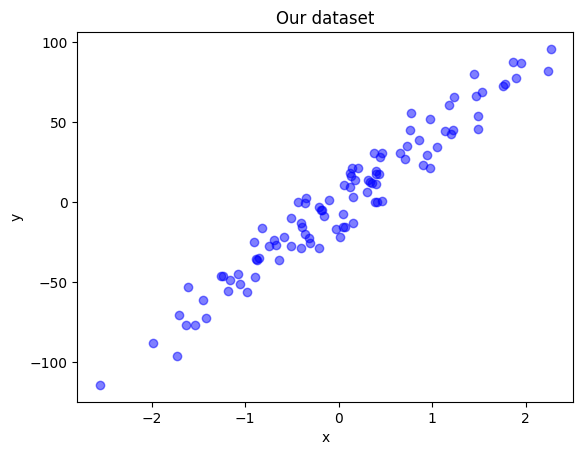

In [12]:
X = np.squeeze(X)
# plot data
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Our dataset')
# display plot
print('Shape of X :', X.shape)
print('Shape of y :', y.shape)
plt.show()

In [13]:
print('observation_nb :', len(X))
print('columns_nb :', 1)

observation_nb : 100
columns_nb : 1


𝑦̂ 𝑖=𝑏+𝑤⋅𝑥𝑖
 

The unknowns of the problem are w and b (geometrically, they represent the slope of the line and its intercept).

we are looking for the pair of slope and intercept (w, b) that minimizes the cost function (MSE)

The optimizer will find the parameters b and w that minimize our loss function.

In [56]:
class Linear():
    def __init__(self):
        self.w = tf.Variable(tf.random.normal([1]), name='weight')
        self.b = tf.Variable(tf.random.normal([1]), name='bias')

    def __call__(self, inputs):
        return inputs * self.w + self.b

In [57]:
model = Linear()
print(model(3).numpy())
print(model.w.numpy())
print(model.b.numpy())



[-3.920698]
[-1.611772]
[0.9146178]


In [58]:
from tensorflow.keras.losses import MeanSquaredError  # Correct import

# model definition
model = Linear()

# Definition of an Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

# Instantiate the MeanSquaredError class
mse = MeanSquaredError()

def train_op(model, inputs, y_true):
    with tf.GradientTape() as tape:
        # model prediction
        y_pred = model(inputs)
        # Calculation of the error of our model
        loss_value = mse(y_true, y_pred)
    # Calculation of the gradient of the loss function
    grads = tape.gradient(loss_value, [model.w, model.b])

    # Gradient descent
    optimizer.apply_gradients(zip(grads, [model.w, model.b]))
    # Return the value of the loss function
    return loss_value.numpy()


steps = 1000
# Training of the model
grads = [train_op(model, X, y) for i in range(steps)]

In [59]:
print('b :', model.b.numpy())
print('w :', model.w.numpy())

b : [-0.7843352]
w : [42.120655]


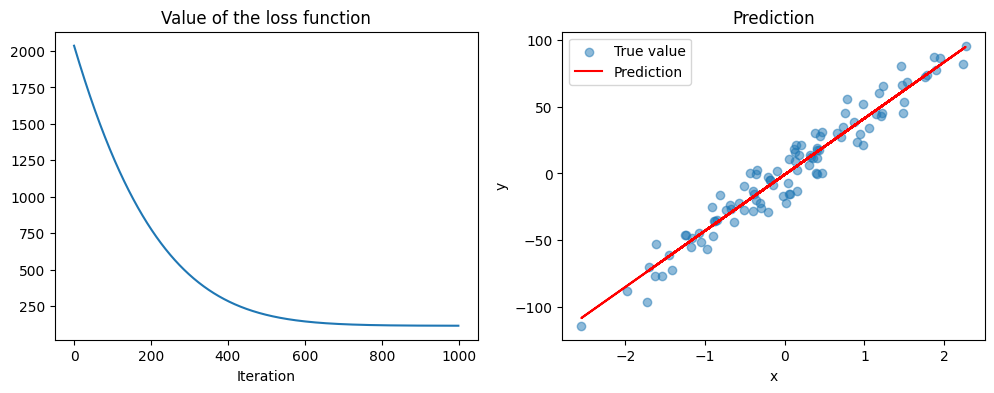

In [60]:
# model prediction
y_pred = model(X)

# display the evolution of the loss function
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(grads)
plt.xlabel('Iteration')
plt.title('Value of the loss function')

plt.subplot(122)
# Display the (x, y) pair of points.
plt.scatter(X, y, alpha=0.5, label='True value')

# Display the prediction of X
plt.plot(X, y_pred, 'r', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction')
plt.legend()
plt.show()

we will now use a third order polynomial model on the same problem

𝑦̂ 𝑖=𝑏+𝑤0𝑥𝑖+𝑤1𝑥2𝑖+𝑤2𝑥3𝑖


In [61]:
class Polynomial(tf.keras.Model):
    def __init__(self):
        # Initialisation of tf.keras.Model
        super(Polynomial, self).__init__()
        # Initialisation of the variable w0.
        self.w0 = tf.Variable(tf.random.normal([1]), name='w0')

        # Initialisation of the variable w1.
        self.w1 = tf.Variable(tf.random.normal([1]), name='w1')

        # Initialisation of the variable w2.
        self.w2 = tf.Variable(tf.random.normal([1]), name='w2')

        # Initialisation of the variable b.
        self.b = tf.Variable(tf.random.normal([1]), name='bias')

    def __call__(self, inputs, training=True):
        # model prediction
        return self.b + self.w0*inputs + self.w1*inputs**2 + self.w2*inputs**3

1e-1 :0.1

1e-2 : 0.01

1e-3: 0.001

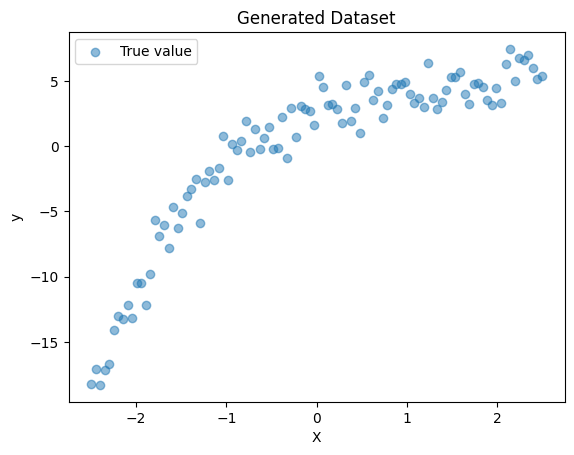

In [67]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate random input data X (e.g., between -2.5 and 2.5)
X = np.linspace(-2.5, 2.5, 100)

# Define the true polynomial function for generating y
# Example: y = 3 + 2*x - 1.5*x^2 + 0.5*x^3 (random coefficients)
y_true = 3 + 2 * X - 1.5 * X**2 + 0.5 * X**3

# Add some noise to the data to make it more realistic
noise = np.random.normal(0, 1, X.shape)
y = y_true + noise

# Plot the generated (X, y) points to visualize the dataset
plt.scatter(X, y, alpha=0.5, label='True value')
plt.title('Generated Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Reshape X and y for model fitting (X needs to be 2D for Keras models)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.9608
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 35.3431
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 27.3874
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 31.8162  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4300 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 23.3189  
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1422 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 25.5819
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 26.4014  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.7798 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 26.9190
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 24.8894  
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 26.0962
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 23.9351  
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 34.7213

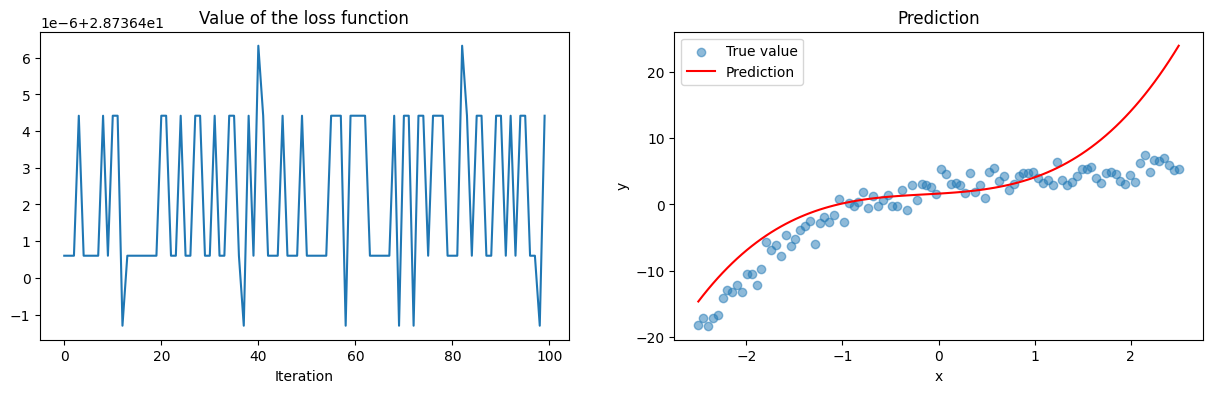

In [70]:
# Define and compile the model
model = Polynomial()

# Optimizer
optimizer = tf.keras.optimizers.Adam(1e-3)

# Compilation
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training the model
training_history = model.fit(X, y, batch_size=16, epochs=100)

# Prediction on a smooth X range for visualization
X_test = np.linspace(-2.5, 2.5, 100)
y_pred = model(X_test).numpy()

# Plot the training loss
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(training_history.history['loss'])
plt.xlabel('Iteration')
plt.title('Value of the loss function')

# Plot the predictions vs true values
plt.subplot(122)
plt.scatter(X, y, alpha=0.5, label='True value')
plt.plot(np.linspace(-2.5, 2.5, 100), y_pred, 'r', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction')
plt.legend()
plt.show()


TensorFlow has a set of loss functions in the tensorflow.keras.losses submodule. Here is a mapping table:


| Loss Function                                      | TensorFlow Equivalent            |
|------------------------------------------------    |----------------------------------|
| Crossed Entropy: Binary classification problem     | `binary_crossentropy`            |
| Crossed Entropy: Multiclass classification problem | `categorical_crossentropy`       |
| Mean Absolute Error: Regression problem            | `mean_absolute_error` or `mae`   |
| Mean Squared Error: Regression problem             | `mean_squared_error` or `mse`    |

